In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/Apple"

/content/drive/My Drive/Apple


In [4]:
at = pd.read_csv('./Machine_Learning/Apple_attribute.csv') # 사과 피쳐
apple_attribute = at.to_numpy()
sw = pd.read_csv('./Machine_Learning/Apple_sweetness.csv') # 사과 당도(회귀 모델)
apple_sweetness = sw.to_numpy()
sw_c = pd.read_csv('./Machine_Learning/Apple_sweetness_c.csv') # 사과 당도(분류 모델)
apple_sweetness = sw.to_numpy()
train_input, test_input, train_target, test_target = train_test_split(apple_attribute, apple_sweetness, test_size=0.2)

poly = PolynomialFeatures(degree=2)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [5]:
at.head()

,1rd_red,1rd_green,1rd_blue,1rd_r,1rd_rg,1rd_most_red,1rd_least_red,1rd_most_yellow,1rd_size,2nd_red,...,6th_red,6th_green,6th_blue,6rd_r,6rd_rg,5rd_most_red.1,5rd_least_red.1,5rd_most_yellow.1,6th_size,height/area
0,184.66,90.55,44.45,49.66,230.76,157.0,-208.0,368.0,10603,143.38,...,156.53,41.70,39.84,74.99,158.39,159.0,-206.0,327.0,9859,0.929831
1,179.48,121.20,68.54,-10.26,232.14,144.0,-229.0,384.0,11573,121.90,...,155.00,56.95,48.92,49.13,163.03,151.0,-179.0,375.0,10762,0.929923
2,179.20,102.23,54.85,22.12,226.58,128.0,-127.0,378.0,11912,138.91,...,165.13,60.78,43.13,61.22,182.78,140.0,-137.0,338.0,11268,0.945937
3,189.01,172.43,74.90,-58.32,286.54,106.0,-236.0,384.0,14758,157.56,...,171.07,80.59,50.33,40.15,201.33,163.0,-233.0,361.0,14459,0.979740
4,158.74,93.24,63.79,1.71,188.19,133.0,-227.0,400.0,12750,171.02,...,130.84,43.93,56.30,30.61,118.47,144.0,-207.0,338.0,12561,0.985176


In [6]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=30)
## 학습데이터에 fit_transform 
train_selected = selector.fit_transform(train_scaled, train_target)
## 테스트 데이터는 transform
test_selected = selector.transform(test_scaled)
train_selected.shape, test_selected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


((160, 30), (40, 30))

In [7]:
#릿지 회귀 모델
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_selected, train_target)
print(round(ridge.score(train_selected, train_target), 4))
print(round(ridge.score(test_selected, test_target), 4))

0.2866
0.1989


In [8]:
print(test_scaled[1])

[ 0.         -2.10489759 -1.94983719 ... -1.17240777 -1.3017174
 -0.41781263]


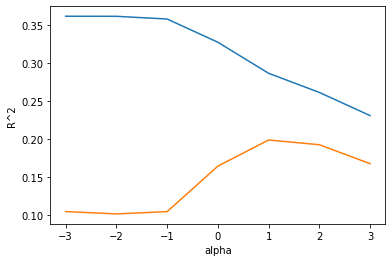

In [9]:
import matplotlib.pyplot as plt #Ridge alpha값 찾기
train_score = [] 
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
  full_ridge = Ridge(alpha=alpha)
  full_ridge.fit(train_selected, train_target)
  train_score.append(full_ridge.score(train_selected, train_target))
  test_score.append(full_ridge.score(test_selected, test_target))  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [10]:
#라쏘 회귀 모델
from sklearn.linear_model import Lasso
full_lasso = Lasso(alpha = 0.1)
full_lasso.fit(train_scaled, train_target)
print(round(full_lasso.score(train_scaled, train_target), 4))
print(round(full_lasso.score(test_scaled, test_target), 4))

0.3968
0.3807


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.923e+00, tolerance: 2.686e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+00, tolerance: 2.686e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


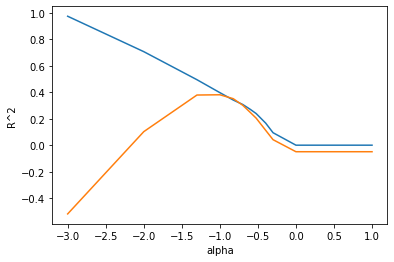

In [11]:
import matplotlib.pyplot as plt #Lasso alpha값 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 10]
for alpha in alpha_list:
  full_lasso = Lasso(alpha=alpha)
  full_lasso.fit(train_scaled, train_target)
  train_score.append(full_lasso.score(train_scaled, train_target))
  test_score.append(full_lasso.score(test_scaled, test_target))  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [12]:
pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import xgboost as xgb
from xgboost import XGBRegressor
# 1. 모델 선언
xgb  = XGBRegressor()

# 2. 모델 훈련 fit()함수
xgb.fit(train_selected, train_target)

# 3. 모델 예측 predict()함수
Y_pred = xgb.predict(test_selected)

# 4. score()
print(xgb.score(train_selected, train_target))
xgb.score(test_selected, test_target)

[20:07:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9008052386605169


0.01369762519261164

In [14]:
import os
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4